In [1]:
# Import libraries
import PL2020 # formerly named dataset2020
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

In [2]:
# Import MyLA311 2020 data
df = PL2020.cleaned_df(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2020.csv") 

# Filter data to March-present
df['month'] = pd.DatetimeIndex(df['CreatedDate']).month # Create month column with value 1-12 representing CreatedDate month
is_after_march = df['month'] >= 3 # Check that month >= 3 (March or later)
df = df[is_after_march] # Separate out data that is after March
df.head()

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hanaa\P-ai\COVID EDA\PL2020.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['ElapsedTime'] = df1 - df2
C:\Users\hanaa\P-ai\COVID EDA\PL2020.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['ElapsedTime'] = hdf['ElapsedTime']/np.timedelta64(1,'m')


,APC,ActionTaken,Address,AddressVerified,Anonymous,ApproximateAddress,AssignTo,CD,CDMember,ClosedDate,...,ServiceDate,Status,StreetName,Suffix,TBMColumn,TBMPage,TBMRow,UpdatedDate,ZipCode,month
225780,South Valley APC,SR Created,"5304 N CORTEEN PL, 91607",Y,Y,N,NDFY,2.0,Paul Krekorian,03/12/2020 02:53:33 PM,...,03/12/2020 12:00:00 AM,Closed,CORTEEN,PL,F,562,2.0,03/12/2020 02:53:34 PM,91607,3
225781,North Valley APC,SR Created,"7948 W DAY ST, 91040",Y,N,NaN,EV,7.0,Monica Rodriguez,03/02/2020 08:41:10 AM,...,03/02/2020 12:00:00 AM,Closed,DAY,ST,H,503,4.0,03/02/2020 06:24:27 PM,91040,3
225782,Central APC,SR Created,"829 N FORMOSA AVE, 90046",Y,Y,N,WLA,5.0,Paul Koretz,03/05/2020 03:37:43 PM,...,03/05/2020 12:00:00 AM,Closed,FORMOSA,AVE,D,593,6.0,03/05/2020 07:45:33 PM,90046,3
225783,Central APC,SR Created,"847 N FORMOSA AVE, 90046",Y,N,N,WLA,5.0,Paul Koretz,03/05/2020 01:46:12 PM,...,03/05/2020 12:00:00 AM,Closed,FORMOSA,AVE,D,593,6.0,03/05/2020 07:18:14 PM,90046,3
225784,South Valley APC,SR Created,"6400 N FAIR AVE, 91606",Y,Y,NaN,EV,2.0,Paul Krekorian,03/04/2020 08:21:09 AM,...,03/10/2020 12:00:00 AM,Closed,FAIR,AVE,J,532,6.0,03/04/2020 08:23:32 AM,91606,3


In [3]:
df['CreatedDate'] = pd.DatetimeIndex(df['CreatedDate']) # Change CreatedDate row to Datetime object
df.dtypes # Check that CreatedDate is datatime type

APC                                  object
ActionTaken                          object
Address                              object
AddressVerified                      object
Anonymous                            object
ApproximateAddress                   object
AssignTo                             object
CD                                  float64
CDMember                             object
ClosedDate                           object
CreatedByUserOrganization            object
CreatedDate                  datetime64[ns]
Direction                            object
ElapsedDays                           int64
ElapsedTime                          object
HouseNumber                          object
Just Date                    datetime64[ns]
Latitude                            float64
Location                             object
Longitude                           float64
MobileOS                             object
NC                                  float64
NCName                          

##  Plot Month vs Number of Requests 

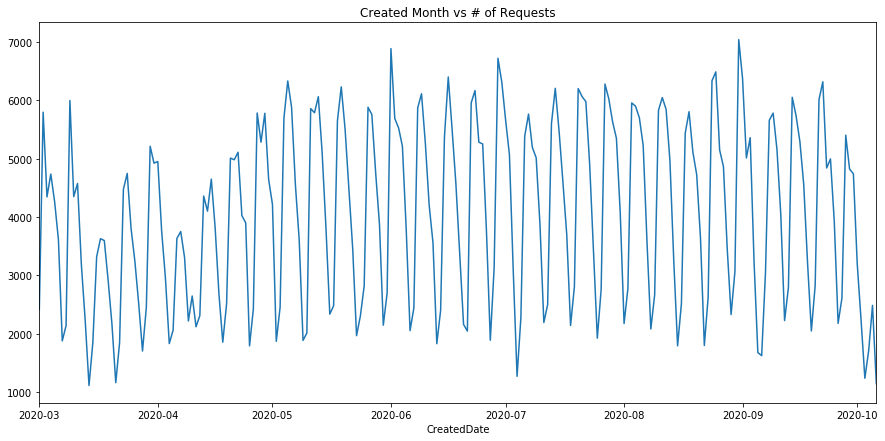

In [4]:
# Month vs Number of Requests
df.groupby(df['CreatedDate'].dt.date).size().plot(figsize=(15, 7), title='Created Month vs # of Requests')

## Plot Month vs Num of Requests (request type)

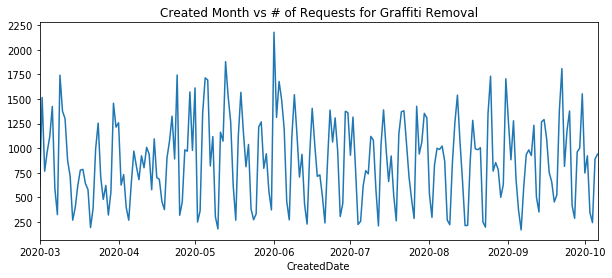

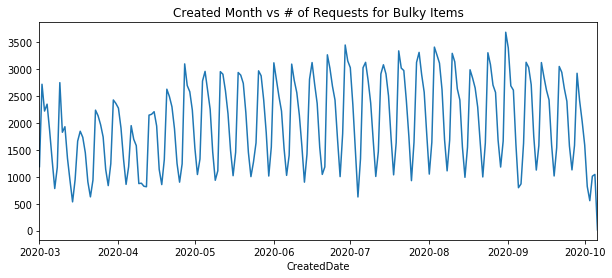

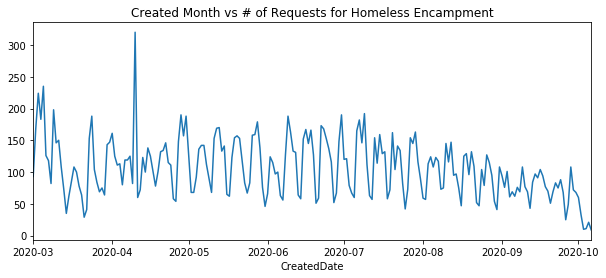

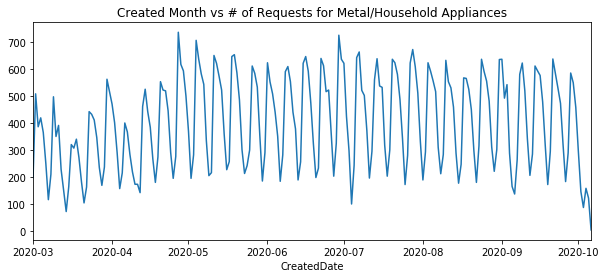

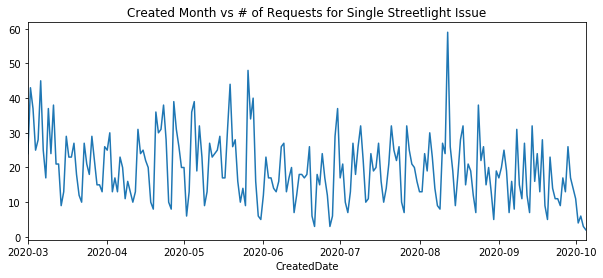

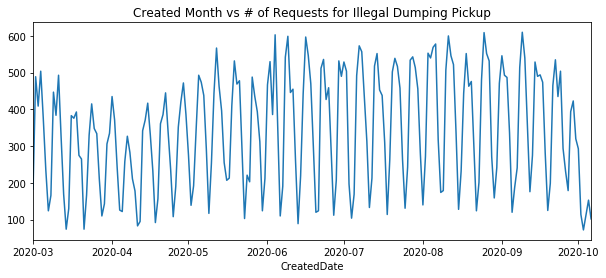

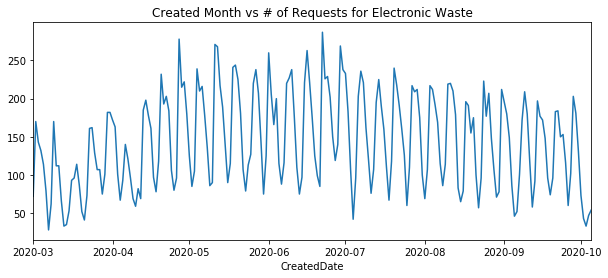

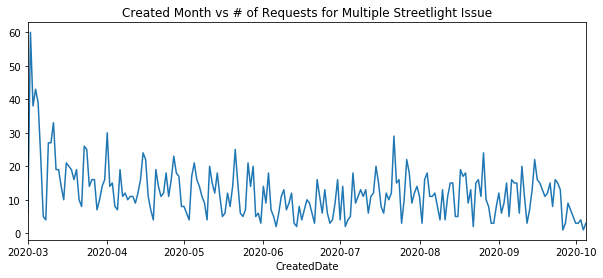

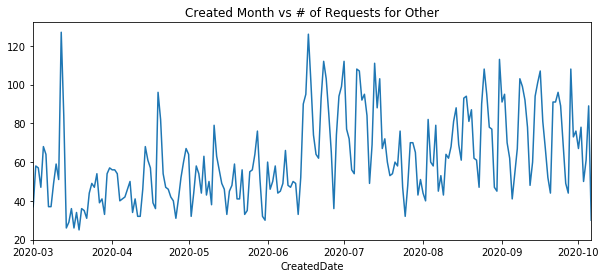

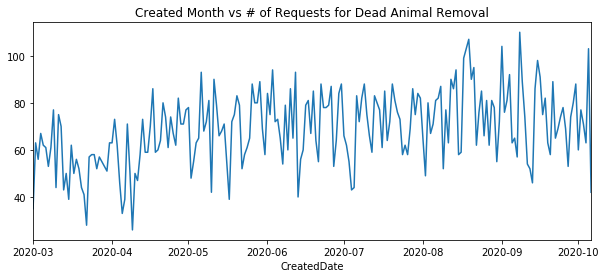

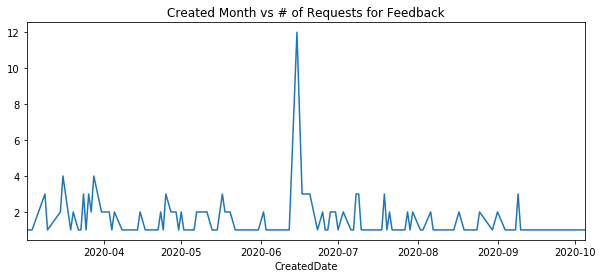

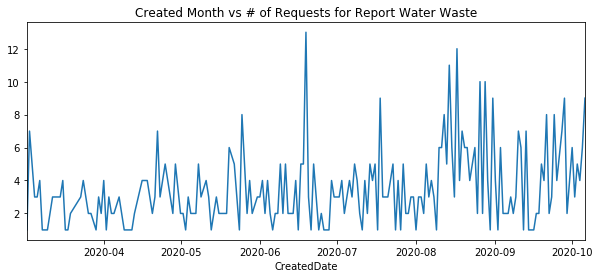

In [5]:
request_types = df['RequestType'].unique() # List of unique RequestTypes

for rtype in request_types:
    is_type = df['RequestType'] == rtype # Check RequestType value
    df_type = df[is_type] # Split dataframe by RequestType
    
    # Plot RequestType data
    plot_title = 'Created Month vs # of Requests for ' + rtype # Create string for title
    df_type.groupby(df['CreatedDate'].dt.date).size().plot(figsize=(10, 4), title=plot_title)
    plt.show()

## Plot Month vs Num of Requests (separated by request type)

In [6]:
# Remove rows with missing CD or CDMember values
df = df[df['CD'].notna()]
df = df[df['CDMember'].notna()]

# Merge CD and CDMember columns into a single column
df_council = df["CD"].astype(str) + ' / ' + df["CDMember"]
df.insert(31, 'CD/Member', df_council)

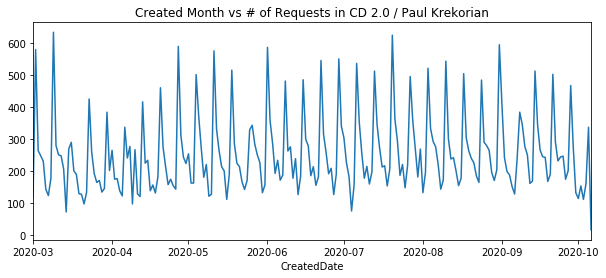

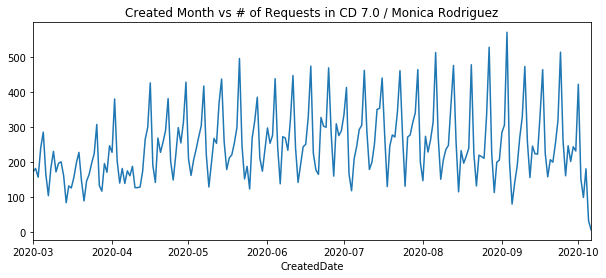

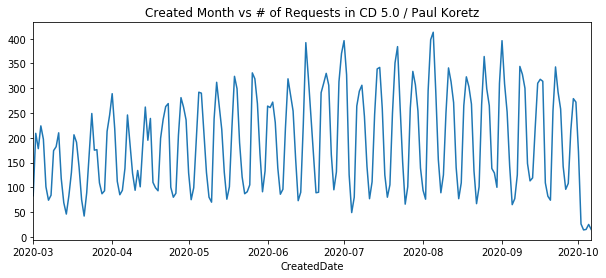

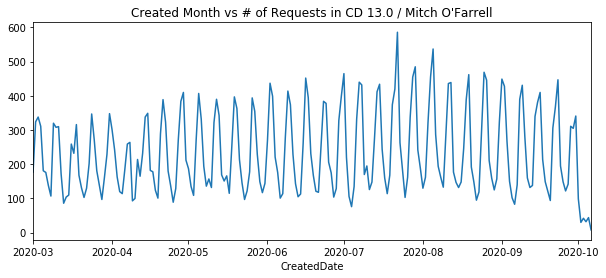

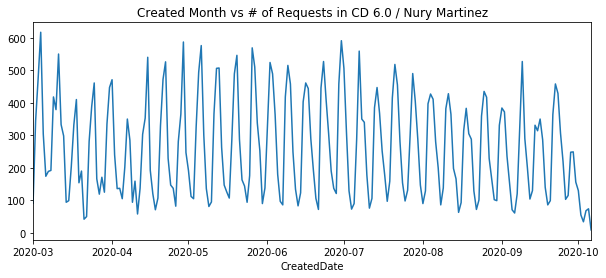

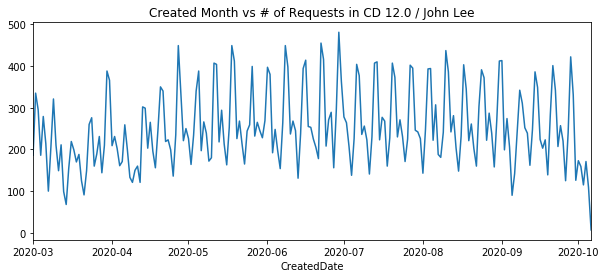

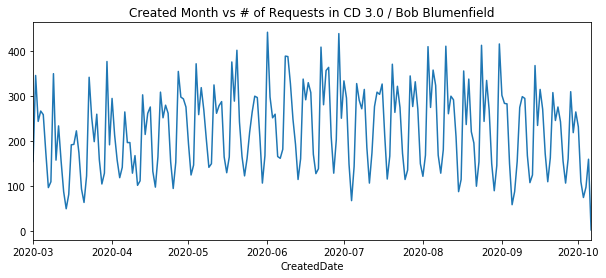

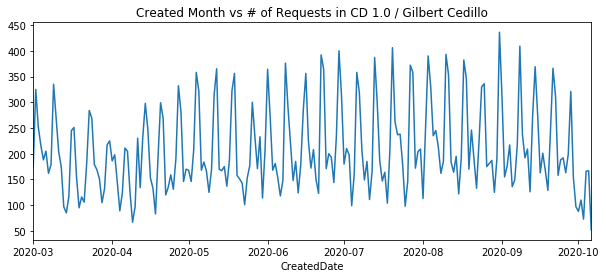

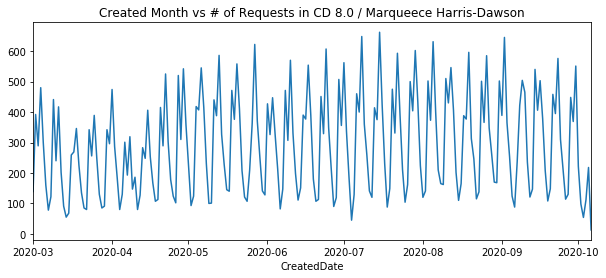

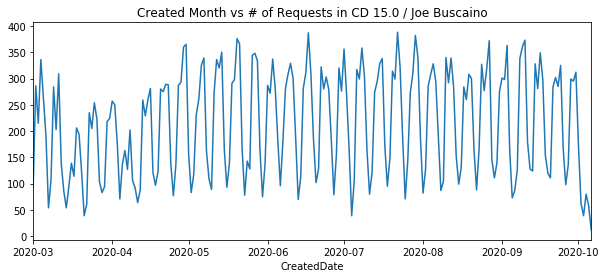

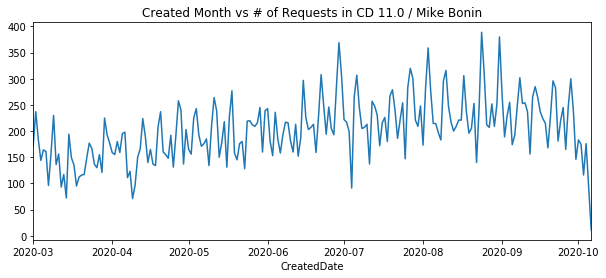

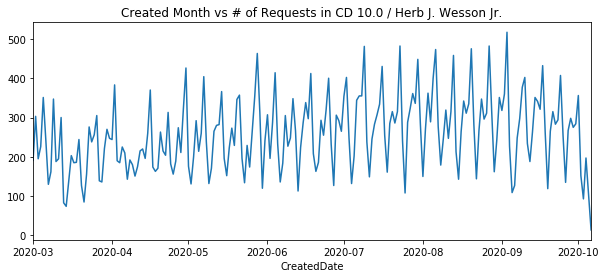

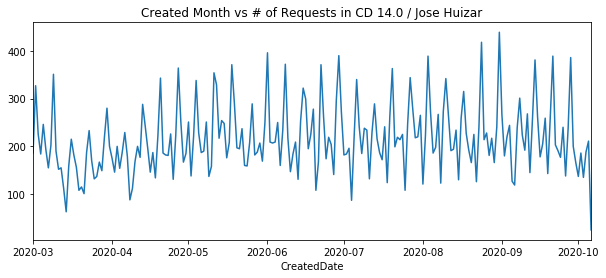

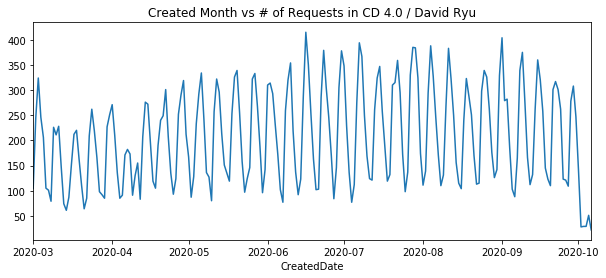

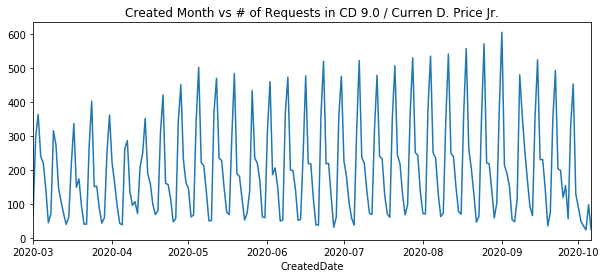

C:\Users\hanaa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 737515.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


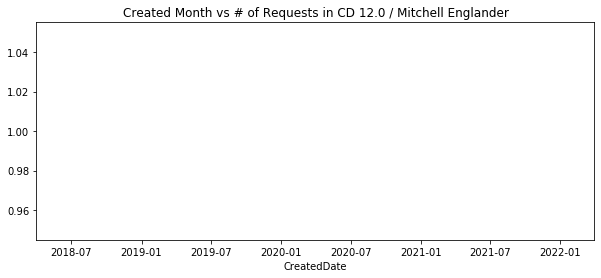

C:\Users\hanaa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 737613.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


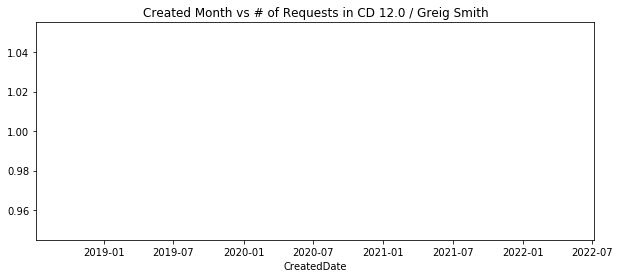

In [7]:
council_pairs = df['CD/Member'].unique() # List of unique CD/Member values
council_pairs = [x for x in council_pairs if str(x) != 'nan'] # Remove nan values from list


for pair in council_pairs:
    is_pair = df['CD/Member'] == pair # Check CD/Member value
    df_council_pair = df[is_pair] # Split dataframe by CD/Member
    
    # Plot CD/Member data (blank graphs are a result of missing data values in the CD or CDMember cols)
    plot_title = 'Created Month vs # of Requests in CD ' + str(pair) # Create string for title
    df_council_pair.groupby(df['CreatedDate'].dt.date).size().plot(figsize=(10, 4), title=plot_title)
    plt.show()
    plt.close()